In [44]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import NullFormatter
import datetime as dt
from math import sqrt, pow
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# warnings
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

%matplotlib inline

ImportError: cannot import name 'tick' from 'matplotlib.ticker' (c:\da-course\env\lib\site-packages\matplotlib\ticker.py)

In [2]:
df_2012 = pd.read_csv("data/2012_Iowa_Liquor_Sales.csv", low_memory=False)

## Format data

In [3]:
df_2012['Date'] = pd.to_datetime(df_2012['Date'])

In [4]:
df_2012['Year'] = df_2012['Date'].dt.strftime('%Y')
df_2012['Month'] = df_2012['Date'].dt.strftime('%m')
df_2012['Day'] = df_2012['Date'].dt.strftime('%d')
df_2012['Day Of Week'] = df_2012['Date'].dt.day_name()

In [5]:
df_2012['Month'] = df_2012['Month'].replace({'01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May', '06': 'June', 
                                            '07':'Jul', '08': 'Aug','09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'})

In [6]:
df_2012['Store Number'] = df_2012['Store Number'].astype('str')
df_2012['County Number'] = df_2012['County Number'].astype('str')
df_2012['Category'] = df_2012['Category'].astype('str')
df_2012['Item Number'] = df_2012['Item Number'].astype('str')
df_2012['Vendor Number'] = df_2012['Vendor Number'].astype('str')

In [7]:
month_category = CategoricalDtype(categories=["Jan", "Feb", "Mar", "Apr", "May", "June", "Jul", "Aug",
                                            "Sep", "Oct", "Nov", "Dec"], ordered=True)

dayOfWeek_category = CategoricalDtype(categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", 
                                                  "Saturday", "Sunday"], ordered=True)

In [8]:
df_2012.head(5)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Month,Day,Day Of Week
0,S03407900058,2012-01-03,2549,HY-VEE FOOD STORE / INDIANOLA,910 N JEFFERSON,INDIANOLA,50125,NaN,91.0,WARREN,...,9.77,14.66,12,175.92,12.0,3.17,2012,Jan,03,Tuesday
1,S03392900003,2012-01-03,2524,HY-VEE FOOD STORE / DUBUQUE,3500 DODGE ST,DUBUQUE,52001,NaN,31.0,DUBUQUE,...,5.99,9.24,6,55.44,10.5,2.77,2012,Jan,03,Tuesday
2,S03392500029,2012-01-03,3908,COUNTY MARKET #214 / FORT MADISON,11802 AVENUE H,FORT MADISON,52627,NaN,56.0,LEE,...,7.59,11.56,12,138.72,9.0,2.38,2012,Jan,03,Tuesday
3,S03407400025,2012-01-03,2962,DAHL'S / JOHNSTON,5440 NW 86TH ST,JOHNSTON,50131,POINT (-93.736517 41.659057),77.0,POLK,...,24.29,36.44,2,72.88,3.5,0.92,2012,Jan,03,Tuesday
4,S03390900077,2012-01-03,3911,"BURG SPIRITS, LLC.",813 1/2 HIGHLAND ST,WILLIAMSBURG,52361,NaN,48.0,IOWA,...,7.59,11.56,2,23.12,1.5,0.40,2012,Jan,03,Tuesday


In [9]:
df_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2082059 entries, 0 to 2082058
Data columns (total 28 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Invoice/Item Number    object        
 1   Date                   datetime64[ns]
 2   Store Number           object        
 3   Store Name             object        
 4   Address                object        
 5   City                   object        
 6   Zip Code               object        
 7   Store Location         object        
 8   County Number          object        
 9   County                 object        
 10  Category               object        
 11  Category Name          object        
 12  Vendor Number          object        
 13  Vendor Name            object        
 14  Item Number            object        
 15  Item Description       object        
 16  Pack                   int64         
 17  Bottle Volume (ml)     int64         
 18  State Bottle Cost     

## Overall Sales of 2012

In [10]:
sale_2012 = '${:,.0f}'.format(df_2012['Sale (Dollars)'].sum())
inv_2012 = '{:,.0f}'.format(len(df_2012['Invoice/Item Number']))

#-----------------------------------#
dow_sale_2012 = df_2012['Sale (Dollars)'].groupby(df_2012['Day Of Week'].astype(dayOfWeek_category)).sum()                         
dow_sale_2012 = dow_sale_2012.apply(lambda x: f'${x:,.0f}').to_frame()

dow_inv_2012 = df_2012['Day Of Week'].astype(dayOfWeek_category).value_counts(sort=False)
dow_inv_2012 = dow_inv_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

dow_2012 = pd.concat([dow_sale_2012, dow_inv_2012], axis=1, join="inner")

#-----------------------------------#
month_sale_2012 = df_2012['Sale (Dollars)'].groupby(df_2012['Month'].astype(month_category)).sum()
month_sale_2012 = month_sale_2012.apply(lambda x: f'${x:,.0f}').to_frame()

month_inv_2012 = df_2012['Month'].value_counts(sort=False)
month_inv_2012 = month_inv_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

month_bottle_2012 = df_2012['Bottles Sold'].groupby(df_2012['Month'].astype(month_category)).sum()
month_bottle_2012 = month_bottle_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of bottle sold')

month_2012 = pd.concat([month_sale_2012, month_inv_2012, month_bottle_2012], axis=1, join="inner")

#-----------------------------------#
#store_sale_2012 = df_2012.groupby(['Store Number','Store Name','Address','City','Zip Code', 
#                                   'Store Location','County'])['Sale (Dollars)'].sum().nlargest(10)
store_sale_2012 = df_2012.groupby(['Store Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
store_sale_2012 = store_sale_2012.apply(lambda x: f'${x:,.0f}').to_frame()

store_inv_2012 = df_2012['Store Name'].value_counts().nlargest(10)
store_inv_2012 = store_inv_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
city_sale_2012 = df_2012.groupby(['City'])['Sale (Dollars)'].sum().nlargest(10)                                   
city_sale_2012 = city_sale_2012.apply(lambda x: f'${x:,.0f}').to_frame()

city_inv_2012 = df_2012['City'].value_counts().nlargest(10)
city_inv_2012 = city_inv_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
county_sale_2012 = df_2012.groupby(['County'])['Sale (Dollars)'].sum().nlargest(10)                                   
county_sale_2012 = county_sale_2012.apply(lambda x: f'${x:,.0f}').to_frame()

county_inv_2012 = df_2012['County'].value_counts().nlargest(10)
county_inv_2012 = county_inv_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
catname_sale_2012 = df_2012.groupby(['Category Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
catname_sale_2012 = catname_sale_2012.apply(lambda x: f'${x:,.0f}').to_frame()

catname_inv_2012 = df_2012['Category Name'].value_counts().nlargest(10)
catname_inv_2012 = catname_inv_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
vendor_sale_2012 = df_2012.groupby(['Vendor Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
vendor_sale_2012 = vendor_sale_2012.apply(lambda x: f'${x:,.0f}').to_frame()

vendor_inv_2012 = df_2012['Vendor Name'].value_counts().nlargest(10)
vendor_inv_2012 = vendor_inv_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
item_sale_2012 = df_2012.groupby(['Item Description'])['Sale (Dollars)'].sum().nlargest(10)                                   
item_sale_2012 = item_sale_2012.apply(lambda x: f'${x:,.0f}').to_frame()

item_inv_2012 = df_2012['Item Description'].value_counts().nlargest(10)
item_inv_2012 = item_inv_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
print(f"_____Overall sales of 2012_____\n")
print(f"Total sale of 2012: {sale_2012}")
print(f"Total invoice of 2012: {inv_2012}")
print("#-----------------------------------#")
print(f"Day of Week with Best Sales:\n {dow_2012}")
print("#-----------------------------------#")
print(f"Month with Best Sales:\n {month_2012}")
print("#-----------------------------------#")
print(f"Store (sales) with Best Sales:\n {store_sale_2012}")
print("#-----------------------------------#")
print(f"Store (invoices) with Best Sales:\n {store_inv_2012}")
print("#-----------------------------------#")
print(f"County (sales) with Best Sales:\n {county_sale_2012}")
print("#-----------------------------------#")
print(f"County (invoices) with Best Sales:\n {county_inv_2012}")
print("#-----------------------------------#")
print(f"City (sales) with Best Sales:\n {city_sale_2012}")
print("#-----------------------------------#")
print(f"City (invoices) with Best Sales:\n {city_inv_2012}")
print("#-----------------------------------#")
print(f"Category (sales) with Best Sales:\n {catname_sale_2012}")
print("#-----------------------------------#")
print(f"Category (invoices) with Best Sales:\n {catname_inv_2012}")
print("#-----------------------------------#")
print(f"Vendor (sales) with Best Sales:\n {vendor_sale_2012}")
print("#-----------------------------------#")
print(f"Vendor (invoices) with Best Sales:\n {vendor_inv_2012}")
print("#-----------------------------------#")
print(f"Item (sales) with Best Sales:\n {item_sale_2012}")
print("#-----------------------------------#")
print(f"Item (invoices) with Best Sales:\n {item_inv_2012}")

_____Overall sales of 2012_____

Total sale of 2012: $255,203,314
Total invoice of 2012: 2,082,059
#-----------------------------------#
Day of Week with Best Sales:
           Sale (Dollars) Num of invoice
Monday       $60,959,562        472,081
Tuesday      $63,181,091        556,486
Wednesday    $53,824,643        470,530
Thursday     $62,400,914        514,020
Friday       $13,756,827         59,201
Saturday      $1,080,277          9,741
Sunday                $0              0
#-----------------------------------#
Month with Best Sales:
      Sale (Dollars) Num of invoice Num of bottle sold
Jan     $15,916,194        147,770          1,302,231
Feb     $18,116,104        156,728          1,457,824
Mar     $18,139,546        160,535          1,458,665
Apr     $20,004,897        164,970          1,588,914
May     $22,193,521        192,270          1,782,175
June    $21,858,903        169,344          1,683,434
Jul     $20,697,364        180,983          1,649,128
Aug     $21,531,283

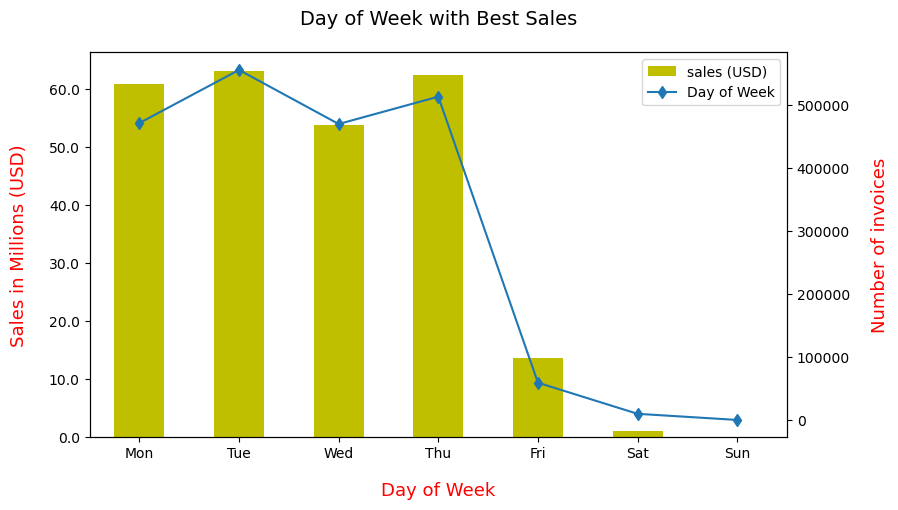

In [27]:
dow_sale_2012 = df_2012['Sale (Dollars)'].groupby(df_2012['Day Of Week'].astype(dayOfWeek_category)).sum()
dow_inv_2012 = df_2012['Day Of Week'].astype(dayOfWeek_category).value_counts(sort=False)

# format large tick value
def formatter(x, pos):
    return str(round(x / 1e6, 1))

fig, ax1 = plt.subplots(figsize=(9, 5))

ax2 = ax1.twinx()

dow_sale_2012.plot(kind='bar', color='y', ax=ax1, label = 'sales (USD)')
dow_inv_2012.plot(kind='line', marker='d', ax=ax2, label='Day of Week')

ax1.yaxis.set_major_formatter(formatter)
ax1.yaxis.set_minor_formatter(NullFormatter())
ax1.set_ylabel("Sales in Millions (USD)", fontsize=13, color='r', labelpad=15)
ax1.set_xlabel("Day of Week", fontsize=13, color='r', labelpad=15)
ax1.set_xticklabels(['Mon', 'Tue','Wed','Thu','Fri','Sat','Sun'], rotation = 0)
ax1.yaxis.tick_left()

ax2.set_ylabel("Number of invoices", fontsize=13, color='r', labelpad=15)
ax2.yaxis.tick_right()

# combine 2 legends into 1
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=0)
ax2.legend().set_visible(False)

plt.title("Day of Week with Best Sales", pad=20, fontsize=14);

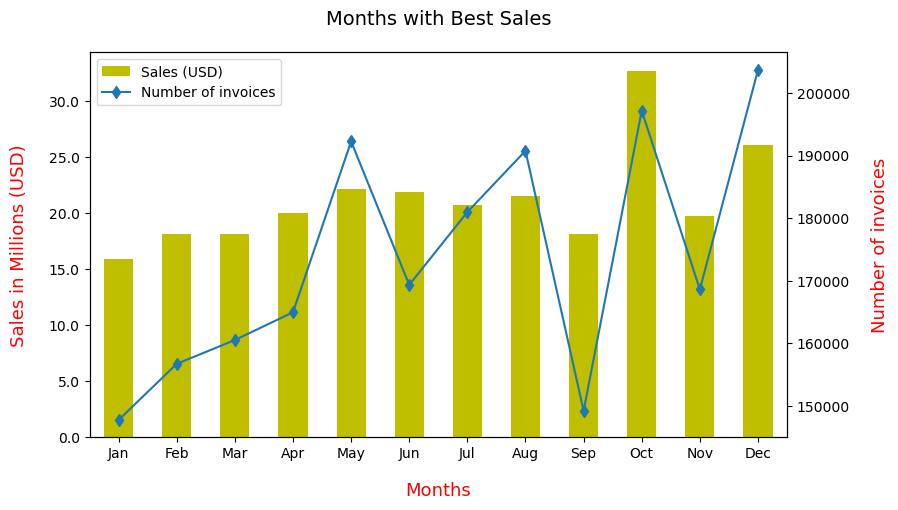

In [31]:
month_sale_2012 = df_2012['Sale (Dollars)'].groupby(df_2012['Month'].astype(month_category)).sum()
month_inv_2012 = df_2012['Month'].value_counts(sort=False)

# format millions number, 60,000,000 = 60 mil
def formatter(x, pos):
    return str(round(x / 1e6, 1))

fig, ax1 = plt.subplots(figsize=(9, 5))

ax2 = ax1.twinx()

month_sale_2012.plot(kind='bar', color='y', ax=ax1, label='Sales (USD)')
month_inv_2012.plot(kind='line', marker='d', ax=ax2, label='Number of invoices')

ax1.yaxis.set_major_formatter(formatter)
ax1.yaxis.set_minor_formatter(NullFormatter())
ax1.set_ylabel("Sales in Millions (USD)", fontsize=13, color='r', labelpad=15)
ax1.set_xlabel("Months", fontsize=13, color='r', labelpad=15)
ax1.set_xticklabels(['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation = 0)
ax1.yaxis.tick_left()

ax2.set_ylabel("Number of invoices", fontsize=13, color='r', labelpad=15)
ax2.yaxis.tick_right()

# combine 2 legends into 1
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=0)
ax2.legend().set_visible(False)

plt.title("Months with Best Sales", pad=20, fontsize=14);

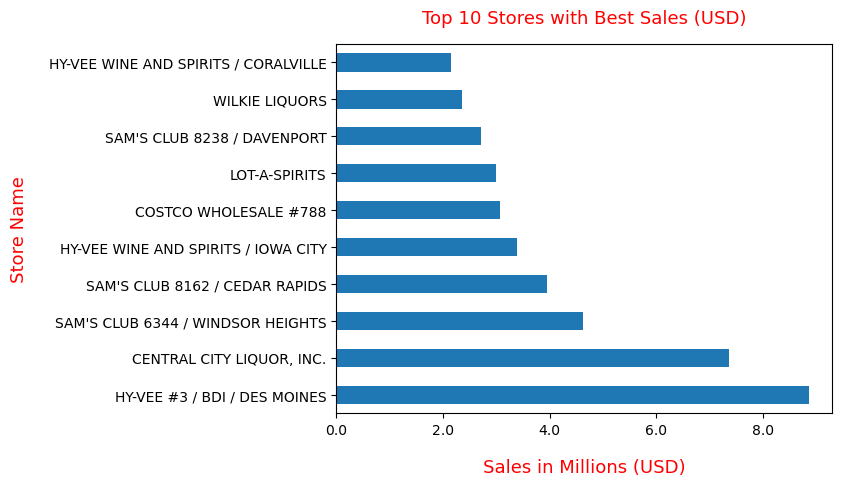

In [46]:
store_sale_2012 = df_2012.groupby(['Store Name'])['Sale (Dollars)'].sum().nlargest(10)                                   

# format large tick value
def formatter(x, pos):
    return str(round(x / 1e6, 1))

ax = store_sale_2012.plot.barh()

ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_formatter(NullFormatter())

plt.ylabel("Store Name", fontsize=13, color='r', labelpad=15)
plt.xlabel("Sales in Millions (USD)", fontsize=13, color='r', labelpad=15)
plt.title("Top 10 Stores with Best Sales (USD)", fontsize=13, color='r', pad=15);

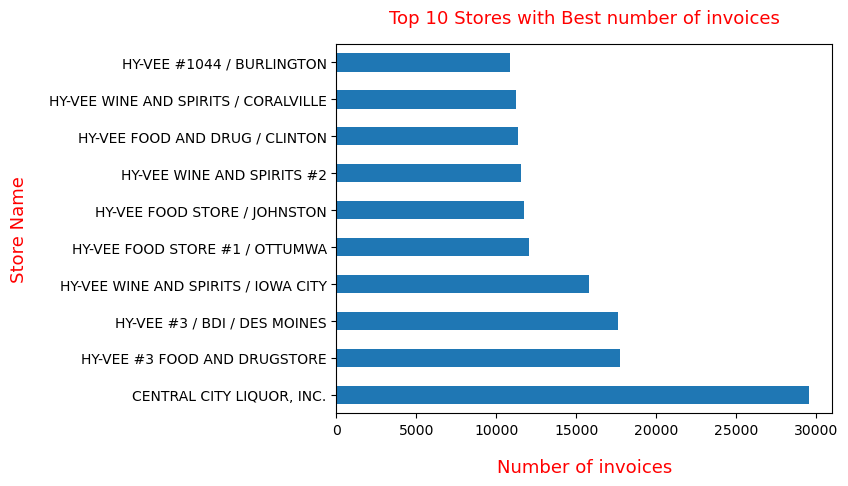

In [48]:
store_inv_2012 = df_2012['Store Name'].value_counts().nlargest(10)

ax = store_inv_2012.plot.barh()

plt.ylabel("Store Name", fontsize=13, color='r', labelpad=15)
plt.xlabel("Number of invoices", fontsize=13, color='r', labelpad=15)
plt.title("Top 10 Stores with Best number of invoices", fontsize=13, color='r', pad=15);

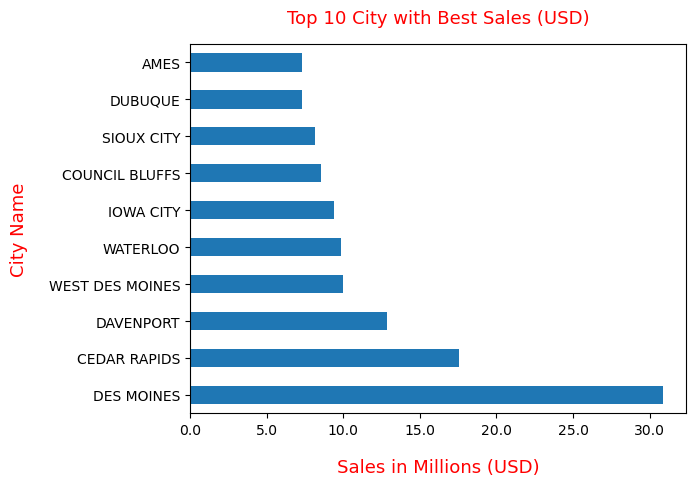

In [49]:
city_sale_2012 = df_2012.groupby(['City'])['Sale (Dollars)'].sum().nlargest(10)                                   

# format large tick value
def formatter(x, pos):
    return str(round(x / 1e6, 1))

ax = city_sale_2012.plot.barh()

ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_formatter(NullFormatter())

plt.ylabel("City Name", fontsize=13, color='r', labelpad=15)
plt.xlabel("Sales in Millions (USD)", fontsize=13, color='r', labelpad=15)
plt.title("Top 10 City with Best Sales (USD)", fontsize=13, color='r', pad=15);

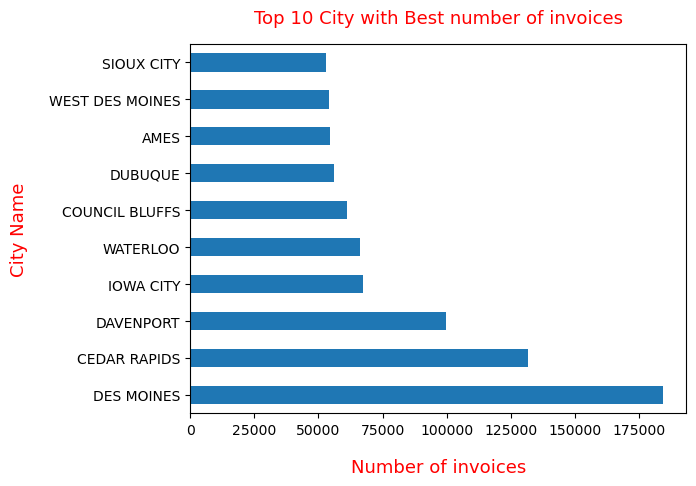

In [50]:
city_inv_2012 = df_2012['City'].value_counts().nlargest(10)

ax = city_inv_2012.plot.barh()

plt.ylabel("City Name", fontsize=13, color='r', labelpad=15)
plt.xlabel("Number of invoices", fontsize=13, color='r', labelpad=15)
plt.title("Top 10 City with Best number of invoices", fontsize=13, color='r', pad=15);

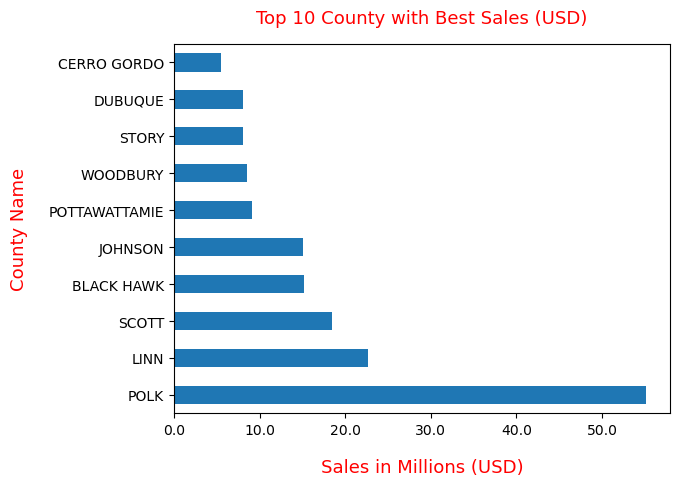

In [51]:
county_sale_2012 = df_2012.groupby(['County'])['Sale (Dollars)'].sum().nlargest(10)                                   

# format large tick value
def formatter(x, pos):
    return str(round(x / 1e6, 1))

ax = county_sale_2012.plot.barh()

ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_formatter(NullFormatter())

plt.ylabel("County Name", fontsize=13, color='r', labelpad=15)
plt.xlabel("Sales in Millions (USD)", fontsize=13, color='r', labelpad=15)
plt.title("Top 10 County with Best Sales (USD)", fontsize=13, color='r', pad=15);

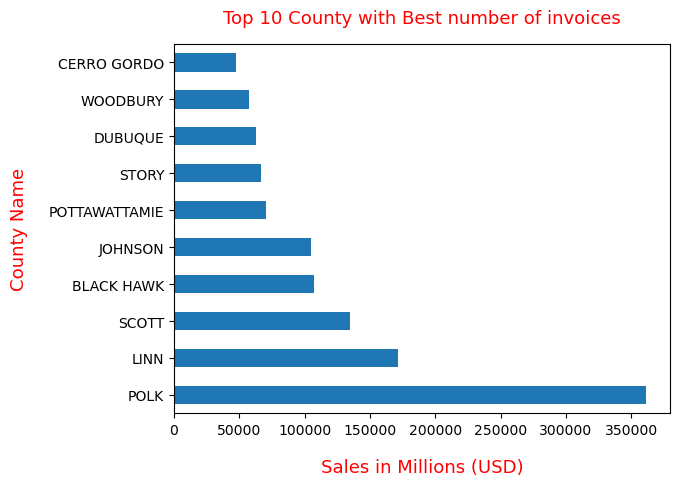

In [52]:
county_inv_2012 = df_2012['County'].value_counts().nlargest(10)

# format large tick value
def formatter(x, pos):
    return str(round(x / 1e6, 1))

ax = county_inv_2012.plot.barh()

plt.ylabel("County Name", fontsize=13, color='r', labelpad=15)
plt.xlabel("Sales in Millions (USD)", fontsize=13, color='r', labelpad=15)
plt.title("Top 10 County with Best number of invoices", fontsize=13, color='r', pad=15);

## Advanced Search

### Query By a Date

In [ ]:
# By a Date
# 2012-01-03

df_byDate_2012 = df_2012[df_2012['Date'] == '2012-01-03']

sale_byDate_2012 = '${:,.0f}'.format(df_byDate_2012['Sale (Dollars)'].sum())
inv_byDate_2012 = '{:,.0f}'.format(len(df_byDate_2012['Invoice/Item Number']))

#-----------------------------------#
dow_sale_byDate_2012 = df_byDate_2012['Sale (Dollars)'].groupby(df_byDate_2012['Day Of Week'].astype(dayOfWeek_category)).sum()                         
dow_sale_byDate_2012 = dow_sale_byDate_2012.apply(lambda x: f'${x:,.0f}').to_frame()

dow_inv_byDate_2012 = df_byDate_2012['Day Of Week'].astype(dayOfWeek_category).value_counts(sort=False)
dow_inv_byDate_2012 = dow_inv_byDate_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

dow_bottle_byDate_2012 = df_byDate_2012['Bottles Sold'].groupby(df_byDate_2012['Month'].astype(month_category)).sum()
dow_bottle_byDate_2012 = dow_bottle_byDate_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of bottle sold')

dow_byDate_2012 = pd.concat([dow_sale_byDate_2012, dow_inv_byDate_2012], axis=1, join="inner")

#-----------------------------------#
month_sale_byDate_2012 = df_byDate_2012['Sale (Dollars)'].groupby(df_byDate_2012['Month'].astype(month_category)).sum()
month_sale_byDate_2012 = month_sale_byDate_2012.apply(lambda x: f'${x:,.0f}').to_frame()

month_inv_byDate_2012 = df_byDate_2012['Month'].value_counts(sort=False)
month_inv_byDate_2012 = month_inv_byDate_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

month_bottle_byDate_2012 = df_byDate_2012['Bottles Sold'].groupby(df_byDate_2012['Month'].astype(month_category)).sum()
month_bottle_byDate_2012 = month_bottle_byDate_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of bottle sold')

month_byDate_2012 = pd.concat([month_sale_byDate_2012, month_inv_byDate_2012, month_bottle_byDate_2012], axis=1, join="inner")

#-----------------------------------#
#store_sale_2012 = df_2012.groupby(['Store Number','Store Name','Address','City','Zip Code', 
#                                   'Store Location','County'])['Sale (Dollars)'].sum().nlargest(10)
store_sale_byDate_2012 = df_byDate_2012.groupby(['Store Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
store_sale_byDate_2012 = store_sale_byDate_2012.apply(lambda x: f'${x:,.0f}').to_frame()

store_inv_byDate_2012 = df_byDate_2012['Store Name'].value_counts().nlargest(10)
store_inv_byDate_2012 = store_inv_byDate_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
city_sale_byDate_2012 = df_byDate_2012.groupby(['City'])['Sale (Dollars)'].sum().nlargest(10)                                   
city_sale_byDate_2012 = city_sale_byDate_2012.apply(lambda x: f'${x:,.0f}').to_frame()

city_inv_byDate_2012 = df_byDate_2012['City'].value_counts().nlargest(10)
city_inv_byDate_2012 = city_inv_byDate_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
county_sale_byDate_2012 = df_byDate_2012.groupby(['County'])['Sale (Dollars)'].sum().nlargest(10)                                   
county_sale_byDate_2012 = county_sale_byDate_2012.apply(lambda x: f'${x:,.0f}').to_frame()

county_inv_byDate_2012 = df_byDate_2012['County'].value_counts().nlargest(10)
county_inv_byDate_2012 = county_inv_byDate_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
catname_sale_byDate_2012 = df_byDate_2012.groupby(['Category Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
catname_sale_byDate_2012 = catname_sale_byDate_2012.apply(lambda x: f'${x:,.0f}').to_frame()

catname_inv_byDate_2012 = df_byDate_2012['Category Name'].value_counts().nlargest(10)
catname_inv_byDate_2012 = catname_inv_byDate_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
vendor_sale_byDate_2012 = df_byDate_2012.groupby(['Vendor Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
vendor_sale_byDate_2012 = vendor_sale_byDate_2012.apply(lambda x: f'${x:,.0f}').to_frame()

vendor_inv_byDate_2012 = df_byDate_2012['Vendor Name'].value_counts().nlargest(10)
vendor_inv_byDate_2012 = vendor_inv_byDate_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
item_sale_byDate_2012 = df_byDate_2012.groupby(['Item Description'])['Sale (Dollars)'].sum().nlargest(10)                                   
item_sale_byDate_2012 = item_sale_byDate_2012.apply(lambda x: f'${x:,.0f}').to_frame()

item_inv_byDate_2012 = df_byDate_2012['Item Description'].value_counts().nlargest(10)
item_inv_byDate_2012 = item_inv_byDate_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
print(f"_____2012-01-03 Sale_____\n")
print(f"Total sale: {sale_byDate_2012}")
print(f"Total invoice: {inv_byDate_2012}")
print("#-----------------------------------#")
print(f"Day of Week with Best Sales:\n {dow_byDate_2012}")
print("#-----------------------------------#")
print(f"Month with Best Sales:\n {month_byDate_2012}")
print("#-----------------------------------#")
print(f"Store (sales) with Best Sales:\n {store_sale_byDate_2012}")
print("#-----------------------------------#")
print(f"Store (invoices) with Best Sales:\n {store_inv_byDate_2012}")
print("#-----------------------------------#")
print(f"County (sales) with Best Sales:\n {city_sale_byDate_2012}")
print("#-----------------------------------#")
print(f"County (invoices) with Best Sales:\n {city_inv_byDate_2012}")
print("#-----------------------------------#")
print(f"City (sales) with Best Sales:\n {county_sale_byDate_2012}")
print("#-----------------------------------#")
print(f"City (invoices) with Best Sales:\n {county_inv_byDate_2012}")
print("#-----------------------------------#")
print(f"Category (sales) with Best Sales:\n {catname_sale_byDate_2012}")
print("#-----------------------------------#")
print(f"Category (invoices) with Best Sales:\n {catname_inv_byDate_2012}")
print("#-----------------------------------#")
print(f"Vendor (sales) with Best Sales:\n {vendor_sale_byDate_2012}")
print("#-----------------------------------#")
print(f"Vendor (invoices) with Best Sales:\n {vendor_inv_byDate_2012}")
print("#-----------------------------------#")
print(f"Item (sales) with Best Sales:\n {item_sale_byDate_2012}")
print("#-----------------------------------#")
print(f"Item (invoices) with Best Sales:\n {item_inv_byDate_2012}")

### Query by Date to Date (Same year)

In [ ]:
# By Date
# 2012-01-03 to 2012-01-04

df_byDateToDate_2012 = df_2012[(df_2012['Date'] >= '2012-01-03') & (df_2012['Date'] <= '2012-01-04')]

sale_byDateToDate_2012 = '${:,.0f}'.format(df_byDateToDate_2012['Sale (Dollars)'].sum())
inv_byDateToDate_2012 = '{:,.0f}'.format(len(df_byDateToDate_2012['Invoice/Item Number']))

#-----------------------------------#
dow_sale_byDateToDate_2012 = df_byDateToDate_2012['Sale (Dollars)'].groupby(df_byDateToDate_2012['Day Of Week'].astype(dayOfWeek_category)).sum()                         
dow_sale_byDateToDate_2012 = dow_sale_byDateToDate_2012.apply(lambda x: f'${x:,.0f}').to_frame()

dow_inv_byDateToDate_2012 = df_byDateToDate_2012['Day Of Week'].astype(dayOfWeek_category).value_counts(sort=False)
dow_inv_byDateToDate_2012 = dow_inv_byDateToDate_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

dow_bottle_byDateToDate_2012 = df_byDateToDate_2012['Bottles Sold'].groupby(df_byDateToDate_2012['Month'].astype(month_category)).sum()
dow_bottle_byDateToDate_2012 = dow_bottle_byDateToDate_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of bottle sold')

dow_byDateToDate_2012 = pd.concat([dow_sale_byDateToDate_2012, dow_inv_byDateToDate_2012], axis=1, join="inner")

#-----------------------------------#
month_sale_byDateToDate_2012 = df_byDateToDate_2012['Sale (Dollars)'].groupby(df_byDateToDate_2012['Month'].astype(month_category)).sum()
month_sale_byDateToDate_2012 = month_sale_byDateToDate_2012.apply(lambda x: f'${x:,.0f}').to_frame()

month_inv_byDateToDate_2012 = df_byDateToDate_2012['Month'].value_counts(sort=False)
month_inv_byDateToDate_2012 = month_inv_byDateToDate_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

month_bottle_byDateToDate_2012 = df_byDateToDate_2012['Bottles Sold'].groupby(df_byDateToDate_2012['Month'].astype(month_category)).sum()
month_bottle_byDateToDate_2012 = month_bottle_byDateToDate_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of bottle sold')

month_byDateToDate_2012 = pd.concat([month_sale_byDateToDate_2012, month_inv_byDateToDate_2012, month_bottle_byDateToDate_2012], axis=1, join="inner")

#-----------------------------------#
#store_sale_2012 = df_2012.groupby(['Store Number','Store Name','Address','City','Zip Code', 
#                                   'Store Location','County'])['Sale (Dollars)'].sum().nlargest(10)
store_sale_byDateToDate_2012 = df_byDateToDate_2012.groupby(['Store Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
store_sale_byDateToDate_2012 = store_sale_byDateToDate_2012.apply(lambda x: f'${x:,.0f}').to_frame()

store_inv_byDateToDate_2012 = df_byDateToDate_2012['Store Name'].value_counts().nlargest(10)
store_inv_byDateToDate_2012 = store_inv_byDateToDate_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
city_sale_byDateToDate_2012 = df_byDateToDate_2012.groupby(['City'])['Sale (Dollars)'].sum().nlargest(10)                                   
city_sale_byDateToDate_2012 = city_sale_byDateToDate_2012.apply(lambda x: f'${x:,.0f}').to_frame()

city_inv_byDateToDate_2012 = df_byDateToDate_2012['City'].value_counts().nlargest(10)
city_inv_byDateToDate_2012 = city_inv_byDateToDate_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
county_sale_byDateToDate_2012 = df_byDateToDate_2012.groupby(['County'])['Sale (Dollars)'].sum().nlargest(10)                                   
county_sale_byDateToDate_2012 = county_sale_byDateToDate_2012.apply(lambda x: f'${x:,.0f}').to_frame()

county_inv_byDateToDate_2012 = df_byDateToDate_2012['County'].value_counts().nlargest(10)
county_inv_byDateToDate_2012 = county_inv_byDateToDate_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
catname_sale_byDateToDate_2012 = df_byDateToDate_2012.groupby(['Category Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
catname_sale_byDateToDate_2012 = catname_sale_byDateToDate_2012.apply(lambda x: f'${x:,.0f}').to_frame()

catname_inv_byDateToDate_2012 = df_byDateToDate_2012['Category Name'].value_counts().nlargest(10)
catname_inv_byDateToDate_2012 = catname_inv_byDateToDate_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
vendor_sale_byDateToDate_2012 = df_byDateToDate_2012.groupby(['Vendor Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
vendor_sale_byDateToDate_2012 = vendor_sale_byDateToDate_2012.apply(lambda x: f'${x:,.0f}').to_frame()

vendor_inv_byDateToDate_2012 = df_byDateToDate_2012['Vendor Name'].value_counts().nlargest(10)
vendor_inv_byDateToDate_2012 = vendor_inv_byDateToDate_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
item_sale_byDateToDate_2012 = df_byDateToDate_2012.groupby(['Item Description'])['Sale (Dollars)'].sum().nlargest(10)                                   
item_sale_byDateToDate_2012 = item_sale_byDateToDate_2012.apply(lambda x: f'${x:,.0f}').to_frame()

item_inv_byDateToDate_2012 = df_byDateToDate_2012['Item Description'].value_counts().nlargest(10)
item_inv_byDateToDate_2012 = item_inv_byDateToDate_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
print(f"_____2012-01-03 to 2012-01-04 Sale_____\n")
print(f"Total sale: {sale_byDateToDate_2012}")
print(f"Total invoice: {inv_byDateToDate_2012}")
print("#-----------------------------------#")
print(f"Day of Week with Best Sales:\n {dow_byDateToDate_2012}")
print("#-----------------------------------#")
print(f"Month with Best Sales:\n {month_byDateToDate_2012}")
print("#-----------------------------------#")
print(f"Store (sales) with Best Sales:\n {store_sale_byDateToDate_2012}")
print("#-----------------------------------#")
print(f"Store (invoices) with Best Sales:\n {store_inv_byDateToDate_2012}")
print("#-----------------------------------#")
print(f"County (sales) with Best Sales:\n {city_sale_byDateToDate_2012}")
print("#-----------------------------------#")
print(f"County (invoices) with Best Sales:\n {city_inv_byDateToDate_2012}")
print("#-----------------------------------#")
print(f"City (sales) with Best Sales:\n {county_sale_byDateToDate_2012}")
print("#-----------------------------------#")
print(f"City (invoices) with Best Sales:\n {county_inv_byDateToDate_2012}")
print("#-----------------------------------#")
print(f"Category (sales) with Best Sales:\n {catname_sale_byDateToDate_2012}")
print("#-----------------------------------#")
print(f"Category (invoices) with Best Sales:\n {catname_inv_byDateToDate_2012}")
print("#-----------------------------------#")
print(f"Vendor (sales) with Best Sales:\n {vendor_sale_byDateToDate_2012}")
print("#-----------------------------------#")
print(f"Vendor (invoices) with Best Sales:\n {vendor_inv_byDateToDate_2012}")
print("#-----------------------------------#")
print(f"Item (sales) with Best Sales:\n {item_sale_byDateToDate_2012}")
print("#-----------------------------------#")
print(f"Item (invoices) with Best Sales:\n {item_inv_byDateToDate_2012}")

### Query By Store

In [ ]:
# By Store
# 2549

df_byStore_2012 = df_2012[df_2012['Store Number'] == '2549']

sale_byStore_2012 = '${:,.0f}'.format(df_byStore_2012['Sale (Dollars)'].sum())
inv_byStore_2012 = '{:,.0f}'.format(len(df_byStore_2012['Invoice/Item Number']))

#-----------------------------------#
dow_sale_byStore_2012 = df_byStore_2012['Sale (Dollars)'].groupby(df_byStore_2012['Day Of Week'].astype(dayOfWeek_category)).sum()                         
dow_sale_byStore_2012 = dow_sale_byStore_2012.apply(lambda x: f'${x:,.0f}').to_frame()

dow_inv_byStore_2012 = df_byStore_2012['Day Of Week'].astype(dayOfWeek_category).value_counts(sort=False)
dow_inv_byStore_2012 = dow_inv_byStore_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

dow_bottle_byStore_2012 = df_byStore_2012['Bottles Sold'].groupby(df_byStore_2012['Month'].astype(month_category)).sum()
dow_bottle_byStore_2012 = dow_bottle_byStore_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of bottle sold')

dow_byStore_2012 = pd.concat([dow_sale_byStore_2012, dow_inv_byStore_2012], axis=1, join="inner")

#-----------------------------------#
month_sale_byStore_2012 = df_byStore_2012['Sale (Dollars)'].groupby(df_byStore_2012['Month'].astype(month_category)).sum()
month_sale_byStore_2012 = month_sale_byStore_2012.apply(lambda x: f'${x:,.0f}').to_frame()

month_inv_byStore_2012 = df_byStore_2012['Month'].value_counts(sort=False)
month_inv_byStore_2012 = month_inv_byStore_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

month_bottle_byStore_2012 = df_byStore_2012['Bottles Sold'].groupby(df_byStore_2012['Month'].astype(month_category)).sum()
month_bottle_byStore_2012 = month_bottle_byStore_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of bottle sold')

month_byStore_2012 = pd.concat([month_sale_byStore_2012, month_inv_byStore_2012, month_bottle_byStore_2012], axis=1, join="inner")

#-----------------------------------#
catname_sale_byStore_2012 = df_byStore_2012.groupby(['Category Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
catname_sale_byStore_2012 = catname_sale_byStore_2012.apply(lambda x: f'${x:,.0f}').to_frame()

catname_inv_byStore_2012 = df_byStore_2012['Category Name'].value_counts().nlargest(10)
catname_inv_byStore_2012 = catname_inv_byStore_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
vendor_sale_byStore_2012 = df_byStore_2012.groupby(['Vendor Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
vendor_sale_byStore_2012 = vendor_sale_byStore_2012.apply(lambda x: f'${x:,.0f}').to_frame()

vendor_inv_byStore_2012 = df_byStore_2012['Vendor Name'].value_counts().nlargest(10)
vendor_inv_byStore_2012 = vendor_inv_byStore_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
item_sale_byStore_2012 = df_byStore_2012.groupby(['Item Description'])['Sale (Dollars)'].sum().nlargest(10)                                   
item_sale_byStore_2012 = item_sale_byStore_2012.apply(lambda x: f'${x:,.0f}').to_frame()

item_inv_byStore_2012 = df_byStore_2012['Item Description'].value_counts().nlargest(10)
item_inv_byStore_2012 = item_inv_byStore_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
print(f"_____Store Sale_____\n")
print(f"Total sale: {sale_byStore_2012}")
print(f"Total invoice: {inv_byStore_2012}")
print("#-----------------------------------#")
print(f"Day of Week with Best Sales:\n {dow_byStore_2012}")
print("#-----------------------------------#")
print(f"Month with Best Sales:\n {month_byStore_2012}")
print("#-----------------------------------#")
print(f"Category (sales) with Best Sales:\n {catname_sale_byStore_2012}")
print("#-----------------------------------#")
print(f"Category (invoices) with Best Sales:\n {catname_inv_byStore_2012}")
print("#-----------------------------------#")
print(f"Vendor (sales) with Best Sales:\n {vendor_sale_byStore_2012}")
print("#-----------------------------------#")
print(f"Vendor (invoices) with Best Sales:\n {vendor_inv_byStore_2012}")
print("#-----------------------------------#")
print(f"Item (sales) with Best Sales:\n {item_sale_byStore_2012}")
print("#-----------------------------------#")
print(f"Item (invoices) with Best Sales:\n {item_inv_byStore_2012}")

### Query by City

In [ ]:
# By City
# INDIANOLA

df_byCity_2012 = df_2012[df_2012['City'] == 'INDIANOLA']

sale_byCity_2012 = '${:,.0f}'.format(df_byCity_2012['Sale (Dollars)'].sum())
inv_byCity_2012 = '{:,.0f}'.format(len(df_byCity_2012['Invoice/Item Number']))

#-----------------------------------#
dow_sale_byCity_2012 = df_byCity_2012['Sale (Dollars)'].groupby(df_byCity_2012['Day Of Week'].astype(dayOfWeek_category)).sum()                         
dow_sale_byCity_2012 = dow_sale_byCity_2012.apply(lambda x: f'${x:,.0f}').to_frame()

dow_inv_byCity_2012 = df_byCity_2012['Day Of Week'].astype(dayOfWeek_category).value_counts(sort=False)
dow_inv_byCity_2012 = dow_inv_byCity_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

dow_bottle_byCity_2012 = df_byCity_2012['Bottles Sold'].groupby(df_byCity_2012['Month'].astype(month_category)).sum()
dow_bottle_byCity_2012 = dow_bottle_byCity_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of bottle sold')

dow_byCity_2012 = pd.concat([dow_sale_byCity_2012, dow_inv_byCity_2012], axis=1, join="inner")

#-----------------------------------#
month_sale_byCity_2012 = df_byCity_2012['Sale (Dollars)'].groupby(df_byCity_2012['Month'].astype(month_category)).sum()
month_sale_byCity_2012 = month_sale_byCity_2012.apply(lambda x: f'${x:,.0f}').to_frame()

month_inv_byCity_2012 = df_byCity_2012['Month'].value_counts(sort=False)
month_inv_byCity_2012 = month_inv_byCity_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

month_bottle_byCity_2012 = df_byCity_2012['Bottles Sold'].groupby(df_byCity_2012['Month'].astype(month_category)).sum()
month_bottle_byCity_2012 = month_bottle_byCity_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of bottle sold')

month_byCity_2012 = pd.concat([month_sale_byCity_2012, month_inv_byCity_2012, month_bottle_byCity_2012], axis=1, join="inner")

#-----------------------------------#
#store_sale_2012 = df_2012.groupby(['Store Number','Store Name','Address','City','Zip Code', 
#                                   'Store Location','County'])['Sale (Dollars)'].sum().nlargest(10)
store_sale_byCity_2012 = df_byCity_2012.groupby(['Store Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
store_sale_byCity_2012 = store_sale_byCity_2012.apply(lambda x: f'${x:,.0f}').to_frame()

store_inv_byCity_2012 = df_byCity_2012['Store Name'].value_counts().nlargest(10)
store_inv_byCity_2012 = store_inv_byCity_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
catname_sale_byCity_2012 = df_byCity_2012.groupby(['Category Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
catname_sale_byCity_2012 = catname_sale_byCity_2012.apply(lambda x: f'${x:,.0f}').to_frame()

catname_inv_byCity_2012 = df_byCity_2012['Category Name'].value_counts().nlargest(10)
catname_inv_byCity_2012 = catname_inv_byCity_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
vendor_sale_byCity_2012 = df_byCity_2012.groupby(['Vendor Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
vendor_sale_byCity_2012 = vendor_sale_byCity_2012.apply(lambda x: f'${x:,.0f}').to_frame()

vendor_inv_byCity_2012 = df_byCity_2012['Vendor Name'].value_counts().nlargest(10)
vendor_inv_byCity_2012 = vendor_inv_byCity_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
item_sale_byCity_2012 = df_byCity_2012.groupby(['Item Description'])['Sale (Dollars)'].sum().nlargest(10)                                   
item_sale_byCity_2012 = item_sale_byCity_2012.apply(lambda x: f'${x:,.0f}').to_frame()

item_inv_byCity_2012 = df_byCity_2012['Item Description'].value_counts().nlargest(10)
item_inv_byCity_2012 = item_inv_byCity_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
print(f"_____City Sale_____\n")
print(f"Total sale: {sale_byCity_2012}")
print(f"Total invoice: {inv_byCity_2012}")
print("#-----------------------------------#")
print(f"Day of Week with Best Sales:\n {dow_byCity_2012}")
print("#-----------------------------------#")
print(f"Month with Best Sales:\n {month_byCity_2012}")
print("#-----------------------------------#")
print(f"Store (sales) with Best Sales:\n {store_sale_byCity_2012}")
print("#-----------------------------------#")
print(f"Store (invoices) with Best Sales:\n {store_inv_byCity_2012}")
print("#-----------------------------------#")
print(f"Category (sales) with Best Sales:\n {catname_sale_byCity_2012}")
print("#-----------------------------------#")
print(f"Category (invoices) with Best Sales:\n {catname_inv_byCity_2012}")
print("#-----------------------------------#")
print(f"Vendor (sales) with Best Sales:\n {vendor_sale_byCity_2012}")
print("#-----------------------------------#")
print(f"Vendor (invoices) with Best Sales:\n {vendor_inv_byCity_2012}")
print("#-----------------------------------#")
print(f"Item (sales) with Best Sales:\n {item_sale_byCity_2012}")
print("#-----------------------------------#")
print(f"Item (invoices) with Best Sales:\n {item_inv_byCity_2012}")

### By County

In [ ]:
# By County
# INDIANOLA

df_byCounty_2012 = df_2012[df_2012['County'] == 'POLK']

sale_byCounty_2012 = '${:,.0f}'.format(df_byCounty_2012['Sale (Dollars)'].sum())
inv_byCounty_2012 = '{:,.0f}'.format(len(df_byCounty_2012['Invoice/Item Number']))

#-----------------------------------#
dow_sale_byCounty_2012 = df_byCounty_2012['Sale (Dollars)'].groupby(df_byCounty_2012['Day Of Week'].astype(dayOfWeek_category)).sum()                         
dow_sale_byCounty_2012 = dow_sale_byCounty_2012.apply(lambda x: f'${x:,.0f}').to_frame()

dow_inv_byCounty_2012 = df_byCounty_2012['Day Of Week'].astype(dayOfWeek_category).value_counts(sort=False)
dow_inv_byCounty_2012 = dow_inv_byCounty_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

dow_bottle_byCounty_2012 = df_byCounty_2012['Bottles Sold'].groupby(df_byCounty_2012['Month'].astype(month_category)).sum()
dow_bottle_byCounty_2012 = dow_bottle_byCounty_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of bottle sold')

dow_byCounty_2012 = pd.concat([dow_sale_byCounty_2012, dow_inv_byCounty_2012], axis=1, join="inner")

#-----------------------------------#
month_sale_byCounty_2012 = df_byCounty_2012['Sale (Dollars)'].groupby(df_byCounty_2012['Month'].astype(month_category)).sum()
month_sale_byCounty_2012 = month_sale_byCounty_2012.apply(lambda x: f'${x:,.0f}').to_frame()

month_inv_byCounty_2012 = df_byCounty_2012['Month'].value_counts(sort=False)
month_inv_byCounty_2012 = month_inv_byCounty_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

month_bottle_byCounty_2012 = df_byCounty_2012['Bottles Sold'].groupby(df_byCounty_2012['Month'].astype(month_category)).sum()
month_bottle_byCounty_2012 = month_bottle_byCounty_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of bottle sold')

month_byCounty_2012 = pd.concat([month_sale_byCounty_2012, month_inv_byCounty_2012, month_bottle_byCounty_2012], axis=1, join="inner")

#-----------------------------------#
#store_sale_2012 = df_2012.groupby(['Store Number','Store Name','Address','City','Zip Code', 
#                                   'Store Location','County'])['Sale (Dollars)'].sum().nlargest(10)
store_sale_byCounty_2012 = df_byCounty_2012.groupby(['Store Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
store_sale_byCounty_2012 = store_sale_byCounty_2012.apply(lambda x: f'${x:,.0f}').to_frame()

store_inv_byCounty_2012 = df_byCounty_2012['Store Name'].value_counts().nlargest(10)
store_inv_byCounty_2012 = store_inv_byCounty_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
city_sale_byCounty_2012 = df_byCounty_2012.groupby(['City'])['Sale (Dollars)'].sum().nlargest(10)                                   
city_sale_byCounty_2012 = city_sale_byCounty_2012.apply(lambda x: f'${x:,.0f}').to_frame()

city_inv_byCounty_2012 = df_byCounty_2012['City'].value_counts().nlargest(10)
city_inv_byCounty_2012 = city_inv_byCounty_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
catname_sale_byCounty_2012 = df_byCounty_2012.groupby(['Category Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
catname_sale_byCounty_2012 = catname_sale_byCounty_2012.apply(lambda x: f'${x:,.0f}').to_frame()

catname_inv_byCounty_2012 = df_byCounty_2012['Category Name'].value_counts().nlargest(10)
catname_inv_byCounty_2012 = catname_inv_byCounty_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
vendor_sale_byCounty_2012 = df_byCounty_2012.groupby(['Vendor Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
vendor_sale_byCounty_2012 = vendor_sale_byCounty_2012.apply(lambda x: f'${x:,.0f}').to_frame()

vendor_inv_byCounty_2012 = df_byCounty_2012['Vendor Name'].value_counts().nlargest(10)
vendor_inv_byCounty_2012 = vendor_inv_byCounty_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
item_sale_byCounty_2012 = df_byCounty_2012.groupby(['Item Description'])['Sale (Dollars)'].sum().nlargest(10)                                   
item_sale_byCounty_2012 = item_sale_byCounty_2012.apply(lambda x: f'${x:,.0f}').to_frame()

item_inv_byCounty_2012 = df_byCounty_2012['Item Description'].value_counts().nlargest(10)
item_inv_byCounty_2012 = item_inv_byCounty_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
print(f"_____County Sale_____\n")
print(f"Total sale: {sale_byCounty_2012}")
print(f"Total invoice: {inv_byCounty_2012}")
print("#-----------------------------------#")
print(f"Day of Week with Best Sales:\n {dow_byCounty_2012}")
print("#-----------------------------------#")
print(f"Month with Best Sales:\n {month_byCounty_2012}")
print("#-----------------------------------#")
print(f"Store (sales) with Best Sales:\n {store_sale_byCounty_2012}")
print("#-----------------------------------#")
print(f"Store (invoices) with Best Sales:\n {store_inv_byCounty_2012}")
print("#-----------------------------------#")
print(f"City (sales) with Best Sales:\n {city_sale_byCounty_2012}")
print("#-----------------------------------#")
print(f"City (invoices) with Best Sales:\n {city_inv_byCounty_2012}")
print("#-----------------------------------#")
print(f"Category (sales) with Best Sales:\n {catname_sale_byCounty_2012}")
print("#-----------------------------------#")
print(f"Category (invoices) with Best Sales:\n {catname_inv_byCounty_2012}")
print("#-----------------------------------#")
print(f"Vendor (sales) with Best Sales:\n {vendor_sale_byCounty_2012}")
print("#-----------------------------------#")
print(f"Vendor (invoices) with Best Sales:\n {vendor_inv_byCounty_2012}")
print("#-----------------------------------#")
print(f"Item (sales) with Best Sales:\n {item_sale_byCounty_2012}")
print("#-----------------------------------#")
print(f"Item (invoices) with Best Sales:\n {item_inv_byCounty_2012}")

### Query by Category

In [ ]:
# By Category
# 1062300.0

df_byCat_2012 = df_2012[df_2012['Category'] == '1062300.0']

sale_byCat_2012 = '${:,.0f}'.format(df_byCat_2012['Sale (Dollars)'].sum())
inv_byCat_2012 = '{:,.0f}'.format(len(df_byCat_2012['Invoice/Item Number']))

#-----------------------------------#
dow_sale_byCat_2012 = df_byCat_2012['Sale (Dollars)'].groupby(df_byCat_2012['Day Of Week'].astype(dayOfWeek_category)).sum()                         
dow_sale_byCat_2012 = dow_sale_byCat_2012.apply(lambda x: f'${x:,.0f}').to_frame()

dow_inv_byCat_2012 = df_byCat_2012['Day Of Week'].astype(dayOfWeek_category).value_counts(sort=False)
dow_inv_byCat_2012 = dow_inv_byCat_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

dow_bottle_byCat_2012 = df_byCat_2012['Bottles Sold'].groupby(df_byCat_2012['Month'].astype(month_category)).sum()
dow_bottle_byCat_2012 = dow_bottle_byCat_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of bottle sold')

dow_byCat_2012 = pd.concat([dow_sale_byCat_2012, dow_inv_byCat_2012], axis=1, join="inner")

#-----------------------------------#
month_sale_byCat_2012 = df_byCat_2012['Sale (Dollars)'].groupby(df_byCat_2012['Month'].astype(month_category)).sum()
month_sale_byCat_2012 = month_sale_byCat_2012.apply(lambda x: f'${x:,.0f}').to_frame()

month_inv_byCat_2012 = df_byCat_2012['Month'].value_counts(sort=False)
month_inv_byCat_2012 = month_inv_byCat_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

month_bottle_byCat_2012 = df_byCat_2012['Bottles Sold'].groupby(df_byCat_2012['Month'].astype(month_category)).sum()
month_bottle_byCat_2012 = month_bottle_byCat_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of bottle sold')

month_byCat_2012 = pd.concat([month_sale_byCat_2012, month_inv_byCat_2012, month_bottle_byCat_2012], axis=1, join="inner")

#-----------------------------------#
#store_sale_2012 = df_2012.groupby(['Store Number','Store Name','Address','City','Zip Code', 
#                                   'Store Location','County'])['Sale (Dollars)'].sum().nlargest(10)
store_sale_byCat_2012 = df_byCat_2012.groupby(['Store Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
store_sale_byCat_2012 = store_sale_byCat_2012.apply(lambda x: f'${x:,.0f}').to_frame()

store_inv_byCat_2012 = df_byCat_2012['Store Name'].value_counts().nlargest(10)
store_inv_byCat_2012 = store_inv_byCat_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
city_sale_byCat_2012 = df_byCat_2012.groupby(['City'])['Sale (Dollars)'].sum().nlargest(10)                                   
city_sale_byCat_2012 = city_sale_byCat_2012.apply(lambda x: f'${x:,.0f}').to_frame()

city_inv_byCat_2012 = df_byCat_2012['City'].value_counts().nlargest(10)
city_inv_byCat_2012 = city_inv_byCat_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
county_sale_byCat_2012 = df_byCat_2012.groupby(['County'])['Sale (Dollars)'].sum().nlargest(10)                                   
county_sale_byCat_2012 = county_sale_byCat_2012.apply(lambda x: f'${x:,.0f}').to_frame()

county_inv_byCat_2012 = df_byCat_2012['County'].value_counts().nlargest(10)
county_inv_byCat_2012 = county_inv_byCat_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
catname_sale_byCat_2012 = df_byCat_2012.groupby(['Category Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
catname_sale_byCat_2012 = catname_sale_byCat_2012.apply(lambda x: f'${x:,.0f}').to_frame()

catname_inv_byCat_2012 = df_byCat_2012['Category Name'].value_counts().nlargest(10)
catname_inv_byCat_2012 = catname_inv_byCat_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
vendor_sale_byCat_2012 = df_byCat_2012.groupby(['Vendor Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
vendor_sale_byCat_2012 = vendor_sale_byCat_2012.apply(lambda x: f'${x:,.0f}').to_frame()

vendor_inv_byCat_2012 = df_byCat_2012['Vendor Name'].value_counts().nlargest(10)
vendor_inv_byCat_2012 = vendor_inv_byCat_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
item_sale_byCat_2012 = df_byCat_2012.groupby(['Item Description'])['Sale (Dollars)'].sum().nlargest(10)                                   
item_sale_byCat_2012 = item_sale_byCat_2012.apply(lambda x: f'${x:,.0f}').to_frame()

item_inv_byCat_2012 = df_byCat_2012['Item Description'].value_counts().nlargest(10)
item_inv_byCat_2012 = item_inv_byCat_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
print(f"_____Category Sale_____\n")
print(f"Total sale: {sale_byCat_2012}")
print(f"Total invoice: {inv_byCat_2012}")
print("#-----------------------------------#")
print(f"Day of Week with Best Sales:\n {dow_byCat_2012}")
print("#-----------------------------------#")
print(f"Month with Best Sales:\n {month_byCat_2012}")
print("#-----------------------------------#")
print(f"City (sales) with Best Sales:\n {city_sale_byCat_2012}")
print("#-----------------------------------#")
print(f"City (invoices) with Best Sales:\n {city_inv_byCat_2012}")
print("#-----------------------------------#")
print(f"County (sales) with Best Sales:\n {county_sale_byCat_2012}")
print("#-----------------------------------#")
print(f"County (invoices) with Best Sales:\n {county_inv_byCat_2012}")
print("#-----------------------------------#")
print(f"Vendor (sales) with Best Sales:\n {vendor_sale_byCat_2012}")
print("#-----------------------------------#")
print(f"Vendor (invoices) with Best Sales:\n {vendor_inv_byCat_2012}")
print("#-----------------------------------#")
print(f"Item (sales) with Best Sales:\n {item_sale_byCat_2012}")
print("#-----------------------------------#")
print(f"Item (invoices) with Best Sales:\n {item_inv_byCat_2012}")

### Query by Vendor

In [ ]:
# By Vendor
# 370

df_byVendor_2012 = df_2012[df_2012['Vendor Number'] == '370']

sale_byVendor_2012 = '${:,.0f}'.format(df_byVendor_2012['Sale (Dollars)'].sum())
inv_byVendor_2012 = '{:,.0f}'.format(len(df_byVendor_2012['Invoice/Item Number']))

#-----------------------------------#
dow_sale_byVendor_2012 = df_byVendor_2012['Sale (Dollars)'].groupby(df_byVendor_2012['Day Of Week'].astype(dayOfWeek_category)).sum()                         
dow_sale_byVendor_2012 = dow_sale_byVendor_2012.apply(lambda x: f'${x:,.0f}').to_frame()

dow_inv_byVendor_2012 = df_byVendor_2012['Day Of Week'].astype(dayOfWeek_category).value_counts(sort=False)
dow_inv_byVendor_2012 = dow_inv_byVendor_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

dow_bottle_byVendor_2012 = df_byVendor_2012['Bottles Sold'].groupby(df_byVendor_2012['Month'].astype(month_category)).sum()
dow_bottle_byVendor_2012 = dow_bottle_byVendor_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of bottle sold')

dow_byVendor_2012 = pd.concat([dow_sale_byVendor_2012, dow_inv_byVendor_2012], axis=1, join="inner")

#-----------------------------------#
month_sale_byVendor_2012 = df_byVendor_2012['Sale (Dollars)'].groupby(df_byVendor_2012['Month'].astype(month_category)).sum()
month_sale_byVendor_2012 = month_sale_byVendor_2012.apply(lambda x: f'${x:,.0f}').to_frame()

month_inv_byVendor_2012 = df_byVendor_2012['Month'].value_counts(sort=False)
month_inv_byVendor_2012 = month_inv_byVendor_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

month_bottle_byVendor_2012 = df_byVendor_2012['Bottles Sold'].groupby(df_byVendor_2012['Month'].astype(month_category)).sum()
month_bottle_byVendor_2012 = month_bottle_byVendor_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of bottle sold')

month_byVendor_2012 = pd.concat([month_sale_byVendor_2012, month_inv_byVendor_2012, month_bottle_byVendor_2012], axis=1, join="inner")

#-----------------------------------#
#store_sale_2012 = df_2012.groupby(['Store Number','Store Name','Address','City','Zip Code', 
#                                   'Store Location','County'])['Sale (Dollars)'].sum().nlargest(10)
store_sale_byVendor_2012 = df_byVendor_2012.groupby(['Store Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
store_sale_byVendor_2012 = store_sale_byVendor_2012.apply(lambda x: f'${x:,.0f}').to_frame()

store_inv_byVendor_2012 = df_byVendor_2012['Store Name'].value_counts().nlargest(10)
store_inv_byVendor_2012 = store_inv_byVendor_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
city_sale_byVendor_2012 = df_byVendor_2012.groupby(['City'])['Sale (Dollars)'].sum().nlargest(10)                                   
city_sale_byVendor_2012 = city_sale_byVendor_2012.apply(lambda x: f'${x:,.0f}').to_frame()

city_inv_byVendor_2012 = df_byVendor_2012['City'].value_counts().nlargest(10)
city_inv_byVendor_2012 = city_inv_byVendor_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
county_sale_byVendor_2012 = df_byVendor_2012.groupby(['County'])['Sale (Dollars)'].sum().nlargest(10)                                   
county_sale_byVendor_2012 = county_sale_byVendor_2012.apply(lambda x: f'${x:,.0f}').to_frame()

county_inv_byVendor_2012 = df_byVendor_2012['County'].value_counts().nlargest(10)
county_inv_byVendor_2012 = county_inv_byVendor_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
catname_sale_byVendor_2012 = df_byVendor_2012.groupby(['Category Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
catname_sale_byVendor_2012 = catname_sale_byVendor_2012.apply(lambda x: f'${x:,.0f}').to_frame()

catname_inv_byVendor_2012 = df_byVendor_2012['Category Name'].value_counts().nlargest(10)
catname_inv_byVendor_2012 = catname_inv_byVendor_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
item_sale_byVendor_2012 = df_byVendor_2012.groupby(['Item Description'])['Sale (Dollars)'].sum().nlargest(10)                                   
item_sale_byVendor_2012 = item_sale_byVendor_2012.apply(lambda x: f'${x:,.0f}').to_frame()

item_inv_byVendor_2012 = df_byVendor_2012['Item Description'].value_counts().nlargest(10)
item_inv_byVendor_2012 = item_inv_byVendor_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
print(f"_____Vendor Sale_____\n")
print(f"Total sale: {sale_byVendor_2012}")
print(f"Total invoice: {inv_byVendor_2012}")
print("#-----------------------------------#")
print(f"Day of Week with Best Sales:\n {dow_byVendor_2012}")
print("#-----------------------------------#")
print(f"Month with Best Sales:\n {month_byVendor_2012}")
print("#-----------------------------------#")
print(f"Store (sales) with Best Sales:\n {store_sale_byVendor_2012}")
print("#-----------------------------------#")
print(f"Store (invoices) with Best Sales:\n {store_inv_byVendor_2012}")
print("#-----------------------------------#")
print(f"County (sales) with Best Sales:\n {city_sale_byVendor_2012}")
print("#-----------------------------------#")
print(f"County (invoices) with Best Sales:\n {city_inv_byVendor_2012}")
print("#-----------------------------------#")
print(f"City (sales) with Best Sales:\n {county_sale_byVendor_2012}")
print("#-----------------------------------#")
print(f"City (invoices) with Best Sales:\n {county_inv_byVendor_2012}")
print("#-----------------------------------#")
print(f"Category (sales) with Best Sales:\n {catname_sale_byVendor_2012}")
print("#-----------------------------------#")
print(f"Category (invoices) with Best Sales:\n {catname_inv_byVendor_2012}")
print("#-----------------------------------#")
print(f"Item (sales) with Best Sales:\n {item_sale_byVendor_2012}")
print("#-----------------------------------#")
print(f"Item (invoices) with Best Sales:\n {item_inv_byVendor_2012}")

### Query by Item

In [ ]:
# By Item
# 42717

df_byItem_2012 = df_2012[(df_2012['Item Number'] == '42717')]

sale_byItem_2012 = '${:,.0f}'.format(df_byItem_2012['Sale (Dollars)'].sum())
inv_byItem_2012 = '{:,.0f}'.format(len(df_byItem_2012['Invoice/Item Number']))

#-----------------------------------#
dow_sale_byItem_2012 = df_byItem_2012['Sale (Dollars)'].groupby(df_byItem_2012['Day Of Week'].astype(dayOfWeek_category)).sum()                         
dow_sale_byItem_2012 = dow_sale_byItem_2012.apply(lambda x: f'${x:,.0f}').to_frame()

dow_inv_byItem_2012 = df_byItem_2012['Day Of Week'].astype(dayOfWeek_category).value_counts(sort=False)
dow_inv_byItem_2012 = dow_inv_byItem_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

dow_bottle_byItem_2012 = df_byItem_2012['Bottles Sold'].groupby(df_byItem_2012['Month'].astype(month_category)).sum()
dow_bottle_byItem_2012 = dow_bottle_byItem_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of bottle sold')

dow_byItem_2012 = pd.concat([dow_sale_byItem_2012, dow_inv_byItem_2012], axis=1, join="inner")

#-----------------------------------#
month_sale_byItem_2012 = df_byItem_2012['Sale (Dollars)'].groupby(df_byItem_2012['Month'].astype(month_category)).sum()
month_sale_byItem_2012 = month_sale_byItem_2012.apply(lambda x: f'${x:,.0f}').to_frame()

month_inv_byItem_2012 = df_byItem_2012['Month'].value_counts(sort=False)
month_inv_byItem_2012 = month_inv_byItem_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

month_bottle_byItem_2012 = df_byItem_2012['Bottles Sold'].groupby(df_byItem_2012['Month'].astype(month_category)).sum()
month_bottle_byItem_2012 = month_bottle_byItem_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of bottle sold')

month_byItem_2012 = pd.concat([month_sale_byItem_2012, month_inv_byItem_2012, month_bottle_byItem_2012], axis=1, join="inner")

#-----------------------------------#
#store_sale_2012 = df_2012.groupby(['Store Number','Store Name','Address','City','Zip Code', 
#                                   'Store Location','County'])['Sale (Dollars)'].sum().nlargest(10)
store_sale_byItem_2012 = df_byItem_2012.groupby(['Store Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
store_sale_byItem_2012 = store_sale_byItem_2012.apply(lambda x: f'${x:,.0f}').to_frame()

store_inv_byItem_2012 = df_byItem_2012['Store Name'].value_counts().nlargest(10)
store_inv_byItem_2012 = store_inv_byItem_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
city_sale_byItem_2012 = df_byItem_2012.groupby(['City'])['Sale (Dollars)'].sum().nlargest(10)                                   
city_sale_byItem_2012 = city_sale_byItem_2012.apply(lambda x: f'${x:,.0f}').to_frame()

city_inv_byItem_2012 = df_byItem_2012['City'].value_counts().nlargest(10)
city_inv_byItem_2012 = city_inv_byItem_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
county_sale_byItem_2012 = df_byItem_2012.groupby(['County'])['Sale (Dollars)'].sum().nlargest(10)                                   
county_sale_byItem_2012 = county_sale_byItem_2012.apply(lambda x: f'${x:,.0f}').to_frame()

county_inv_byItem_2012 = df_byItem_2012['County'].value_counts().nlargest(10)
county_inv_byItem_2012 = county_inv_byItem_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
catname_sale_byItem_2012 = df_byItem_2012.groupby(['Category Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
catname_sale_byItem_2012 = catname_sale_byItem_2012.apply(lambda x: f'${x:,.0f}').to_frame()

catname_inv_byItem_2012 = df_byItem_2012['Category Name'].value_counts().nlargest(10)
catname_inv_byItem_2012 = catname_inv_byItem_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
vendor_sale_byItem_2012 = df_byItem_2012.groupby(['Vendor Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
vendor_sale_byItem_2012 = vendor_sale_byItem_2012.apply(lambda x: f'${x:,.0f}').to_frame()

vendor_inv_byItem_2012 = df_byItem_2012['Vendor Name'].value_counts().nlargest(10)
vendor_inv_byItem_2012 = vendor_inv_byItem_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
print(f"_____Item Sale_____\n")
print(f"Total sale: {sale_byItem_2012}")
print(f"Total invoice: {inv_byItem_2012}")
print("#-----------------------------------#")
print(f"Day of Week with Best Sales:\n {dow_byItem_2012}")
print("#-----------------------------------#")
print(f"Month with Best Sales:\n {month_byItem_2012}")
print("#-----------------------------------#")
print(f"Store (sales) with Best Sales:\n {store_sale_byItem_2012}")
print("#-----------------------------------#")
print(f"Store (invoices) with Best Sales:\n {store_inv_byItem_2012}")
print("#-----------------------------------#")
print(f"County (sales) with Best Sales:\n {city_sale_byItem_2012}")
print("#-----------------------------------#")
print(f"County (invoices) with Best Sales:\n {city_inv_byItem_2012}")
print("#-----------------------------------#")
print(f"City (sales) with Best Sales:\n {county_sale_byItem_2012}")
print("#-----------------------------------#")
print(f"City (invoices) with Best Sales:\n {county_inv_byItem_2012}")
print("#-----------------------------------#")
print(f"Category (sales) with Best Sales:\n {catname_sale_byItem_2012}")
print("#-----------------------------------#")
print(f"Category (invoices) with Best Sales:\n {catname_inv_byItem_2012}")
print("#-----------------------------------#")
print(f"Vendor (sales) with Best Sales:\n {vendor_sale_byItem_2012}")
print("#-----------------------------------#")
print(f"Vendor (invoices) with Best Sales:\n {vendor_inv_byItem_2012}")

### Query by Month to Month

In [ ]:
# By Month
# 2012-01 to 2012-02

df_byMonthToMonth_2012 = df_2012[(df_2012['Month'] == 'Jan')]

sale_byMonthToMonth_2012 = '${:,.0f}'.format(df_byMonthToMonth_2012['Sale (Dollars)'].sum())
inv_byMonthToMonth_2012 = '{:,.0f}'.format(len(df_byMonthToMonth_2012['Invoice/Item Number']))

#-----------------------------------#
dow_sale_byMonthToMonth_2012 = df_byMonthToMonth_2012['Sale (Dollars)'].groupby(df_byMonthToMonth_2012['Day Of Week'].astype(dayOfWeek_category)).sum()                         
dow_sale_byMonthToMonth_2012 = dow_sale_byMonthToMonth_2012.apply(lambda x: f'${x:,.0f}').to_frame()

dow_inv_byMonthToMonth_2012 = df_byMonthToMonth_2012['Day Of Week'].astype(dayOfWeek_category).value_counts(sort=False)
dow_inv_byMonthToMonth_2012 = dow_inv_byMonthToMonth_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

dow_bottle_byMonthToMonth_2012 = df_byMonthToMonth_2012['Bottles Sold'].groupby(df_byMonthToMonth_2012['Month'].astype(month_category)).sum()
dow_bottle_byMonthToMonth_2012 = dow_bottle_byMonthToMonth_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of bottle sold')

dow_byMonthToMonth_2012 = pd.concat([dow_sale_byMonthToMonth_2012, dow_inv_byMonthToMonth_2012], axis=1, join="inner")

#-----------------------------------#
month_sale_byMonthToMonth_2012 = df_byMonthToMonth_2012['Sale (Dollars)'].groupby(df_byMonthToMonth_2012['Month'].astype(month_category)).sum()
month_sale_byMonthToMonth_2012 = month_sale_byMonthToMonth_2012.apply(lambda x: f'${x:,.0f}').to_frame()

month_inv_byMonthToMonth_2012 = df_byMonthToMonth_2012['Month'].value_counts(sort=False)
month_inv_byMonthToMonth_2012 = month_inv_byMonthToMonth_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

month_bottle_byMonthToMonth_2012 = df_byMonthToMonth_2012['Bottles Sold'].groupby(df_byMonthToMonth_2012['Month'].astype(month_category)).sum()
month_bottle_byMonthToMonth_2012 = month_bottle_byMonthToMonth_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of bottle sold')

month_byMonthToMonth_2012 = pd.concat([month_sale_byMonthToMonth_2012, month_inv_byMonthToMonth_2012, month_bottle_byMonthToMonth_2012], axis=1, join="inner")

#-----------------------------------#
#store_sale_2012 = df_2012.groupby(['Store Number','Store Name','Address','City','Zip Code', 
#                                   'Store Location','County'])['Sale (Dollars)'].sum().nlargest(10)
store_sale_byMonthToMonth_2012 = df_byMonthToMonth_2012.groupby(['Store Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
store_sale_byMonthToMonth_2012 = store_sale_byMonthToMonth_2012.apply(lambda x: f'${x:,.0f}').to_frame()

store_inv_byMonthToMonth_2012 = df_byMonthToMonth_2012['Store Name'].value_counts().nlargest(10)
store_inv_byMonthToMonth_2012 = store_inv_byMonthToMonth_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
city_sale_byMonthToMonth_2012 = df_byMonthToMonth_2012.groupby(['City'])['Sale (Dollars)'].sum().nlargest(10)                                   
city_sale_byMonthToMonth_2012 = city_sale_byMonthToMonth_2012.apply(lambda x: f'${x:,.0f}').to_frame()

city_inv_byMonthToMonth_2012 = df_byMonthToMonth_2012['City'].value_counts().nlargest(10)
city_inv_byMonthToMonth_2012 = city_inv_byMonthToMonth_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
county_sale_byMonthToMonth_2012 = df_byMonthToMonth_2012.groupby(['County'])['Sale (Dollars)'].sum().nlargest(10)                                   
county_sale_byMonthToMonth_2012 = county_sale_byMonthToMonth_2012.apply(lambda x: f'${x:,.0f}').to_frame()

county_inv_byMonthToMonth_2012 = df_byMonthToMonth_2012['County'].value_counts().nlargest(10)
county_inv_byMonthToMonth_2012 = county_inv_byMonthToMonth_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
catname_sale_byMonthToMonth_2012 = df_byMonthToMonth_2012.groupby(['Category Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
catname_sale_byMonthToMonth_2012 = catname_sale_byMonthToMonth_2012.apply(lambda x: f'${x:,.0f}').to_frame()

catname_inv_byMonthToMonth_2012 = df_byMonthToMonth_2012['Category Name'].value_counts().nlargest(10)
catname_inv_byMonthToMonth_2012 = catname_inv_byMonthToMonth_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
vendor_sale_byMonthToMonth_2012 = df_byMonthToMonth_2012.groupby(['Vendor Name'])['Sale (Dollars)'].sum().nlargest(10)                                   
vendor_sale_byMonthToMonth_2012 = vendor_sale_byMonthToMonth_2012.apply(lambda x: f'${x:,.0f}').to_frame()

vendor_inv_byMonthToMonth_2012 = df_byMonthToMonth_2012['Vendor Name'].value_counts().nlargest(10)
vendor_inv_byMonthToMonth_2012 = vendor_inv_byMonthToMonth_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
item_sale_byMonthToMonth_2012 = df_byMonthToMonth_2012.groupby(['Item Description'])['Sale (Dollars)'].sum().nlargest(10)                                   
item_sale_byMonthToMonth_2012 = item_sale_byMonthToMonth_2012.apply(lambda x: f'${x:,.0f}').to_frame()

item_inv_byMonthToMonth_2012 = df_byMonthToMonth_2012['Item Description'].value_counts().nlargest(10)
item_inv_byMonthToMonth_2012 = item_inv_byMonthToMonth_2012.apply(lambda x: f'{x:,.0f}').to_frame(name='Num of invoice')

#-----------------------------------#
print(f"_____2012-01 to 2012-02 Sale_____\n")
print(f"Total sale: {sale_byMonthToMonth_2012}")
print(f"Total invoice: {inv_byMonthToMonth_2012}")
print("#-----------------------------------#")
print(f"Day of Week with Best Sales:\n {dow_byMonthToMonth_2012}")
print("#-----------------------------------#")
print(f"Month with Best Sales:\n {month_byMonthToMonth_2012}")
print("#-----------------------------------#")
print(f"Store (sales) with Best Sales:\n {store_sale_byMonthToMonth_2012}")
print("#-----------------------------------#")
print(f"Store (invoices) with Best Sales:\n {store_inv_byMonthToMonth_2012}")
print("#-----------------------------------#")
print(f"County (sales) with Best Sales:\n {city_sale_byMonthToMonth_2012}")
print("#-----------------------------------#")
print(f"County (invoices) with Best Sales:\n {city_inv_byMonthToMonth_2012}")
print("#-----------------------------------#")
print(f"City (sales) with Best Sales:\n {county_sale_byMonthToMonth_2012}")
print("#-----------------------------------#")
print(f"City (invoices) with Best Sales:\n {county_inv_byMonthToMonth_2012}")
print("#-----------------------------------#")
print(f"Category (sales) with Best Sales:\n {catname_sale_byMonthToMonth_2012}")
print("#-----------------------------------#")
print(f"Category (invoices) with Best Sales:\n {catname_inv_byMonthToMonth_2012}")
print("#-----------------------------------#")
print(f"Vendor (sales) with Best Sales:\n {vendor_sale_byMonthToMonth_2012}")
print("#-----------------------------------#")
print(f"Vendor (invoices) with Best Sales:\n {vendor_inv_byMonthToMonth_2012}")
print("#-----------------------------------#")
print(f"Item (sales) with Best Sales:\n {item_sale_byMonthToMonth_2012}")
print("#-----------------------------------#")
print(f"Item (invoices) with Best Sales:\n {item_inv_byMonthToMonth_2012}")